This notebook has been designed for the cooking challenge competition. It has been made by Paula Lago. 

# Exploring the data

In [1]:
import pandas as pd
import glob
import numpy as np
from tsfresh import extract_features
%matplotlib inline  
# enable plots to be shown in the notebook

First we will try to read one file and explore the data. We will use glob to get all files in one folder. Glob searches all files that match a query string. In this case, we want all files inside the right arm folder with csv extension.

In [2]:
import os
cdir = os.getcwd()
print(cdir)
os.chdir(cdir + '/train/train')
print(os.getcwd())

/home/nabil/ml_contests/cooking_activity/cook2020_tutorials
/home/nabil/ml_contests/cooking_activity/cook2020_tutorials/train/train


In [3]:
data_folder = 'right_arm/*.csv' 
files = glob.glob(data_folder)

The files variable now contains all the files that matched our query.

In [4]:
print(len(files))
print(files[:10]) #Print the first ten file names

288
['right_arm/subject1_file_320.csv', 'right_arm/subject3_file_949.csv', 'right_arm/subject2_file_650.csv', 'right_arm/subject1_file_45.csv', 'right_arm/subject3_file_14.csv', 'right_arm/subject3_file_352.csv', 'right_arm/subject2_file_378.csv', 'right_arm/subject2_file_172.csv', 'right_arm/subject3_file_775.csv', 'right_arm/subject3_file_609.csv']


Let's read one of the files and see what it contains

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c9c09a3c8>,
      dtype=object)

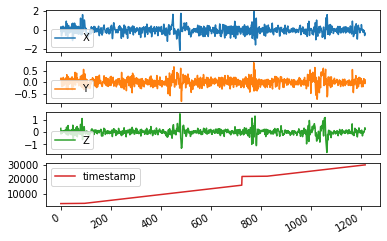

In [5]:
import random
arm_data = pd.read_csv(files[random.randint(0,200)])
arm_data.plot(subplots=True)

In [9]:
arm_data.columns

Index(['X', 'Y', 'Z', 'timestamp'], dtype='object')

In [10]:
arm_data.shape

(1363, 4)

In [13]:
arm_data['id'] = 0

In [14]:
arm_data

,X,Y,Z,timestamp,id
0,-0.3132,0.2451,0.1654,13,0
1,-0.2730,-0.1749,-0.0690,33,0
2,0.1866,-0.3192,-0.0162,54,0
3,0.0881,0.0051,-0.0081,74,0
4,-0.5136,0.3645,-0.0943,93,0
...,...,...,...,...,...
1358,-0.2392,0.0918,0.4905,29914,0
1359,-0.1291,0.1335,0.4996,29933,0
1360,0.3670,0.2446,0.3812,29954,0
1361,0.4153,0.1976,0.3453,29974,0


In [15]:
extracted_features = extract_features(arm_data, column_id="id", column_sort="timestamp")

Feature Extraction: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]


In [16]:
extracted_features

variable,X__abs_energy,X__absolute_sum_of_changes,"X__agg_autocorrelation__f_agg_""mean""__maxlag_40","X__agg_autocorrelation__f_agg_""median""__maxlag_40","X__agg_autocorrelation__f_agg_""var""__maxlag_40","X__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","X__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","X__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","X__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","X__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,Z__symmetry_looking__r_0.9,Z__symmetry_looking__r_0.9500000000000001,Z__time_reversal_asymmetry_statistic__lag_1,Z__time_reversal_asymmetry_statistic__lag_2,Z__time_reversal_asymmetry_statistic__lag_3,Z__value_count__value_-1,Z__value_count__value_0,Z__value_count__value_1,Z__variance,Z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,340.928615,257.338994,0.012282,-0.111309,0.06513,0.334378,0.110565,0.001098,0.00085,0.697991,...,1.0,1.0,-0.00018,-0.000933,-0.002804,0.0,0.0,0.0,0.194285,0.0


In [32]:
arm_data = arm_data.sort_values(by=['timestamp'])

Let's read the labels file to identify what is the activity for this file. We will first read the file into a single column.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bfa4e4518>,
      dtype=object)

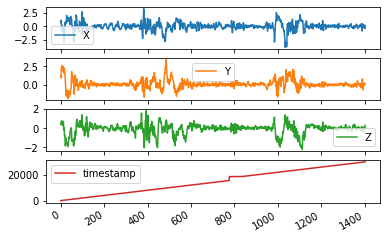

In [33]:
arm_data.plot(subplots=True)

In [7]:
labels = pd.read_csv("labels.txt", sep=' ', header=None)
labels.head()

,0
0,"subject2_file_457,sandwich,Take,"
1,"subject2_file_679,sandwich,Wash,Take,"
2,"subject2_file_95,sandwich,Cut,Wash,"
3,"subject2_file_899,sandwich,other,Cut,Put,"
4,"subject2_file_368,sandwich,Put,"


We will now split the file identifier and the macro activity into separate columns using the split method

In [8]:
labels = labels[0].str.split(",", n=2, expand=True)
labels.columns = ['file_id', 'macro', 'micro'] #give names to the columns
labels.index = labels['file_id'] #use the file id as index to make it searchable by file_id
labels.head()

,file_id,macro,micro
file_id,,,
subject2_file_457,subject2_file_457,sandwich,"Take,"
subject2_file_679,subject2_file_679,sandwich,"Wash,Take,"
subject2_file_95,subject2_file_95,sandwich,"Cut,Wash,"
subject2_file_899,subject2_file_899,sandwich,"other,Cut,Put,"
subject2_file_368,subject2_file_368,sandwich,"Put,"


In [42]:
mac_label_set = set(list(labels['macro']))

In [45]:
mac_label_set

{'Add,Cut,Put,Take,',
 'Add,Mix,Take,',
 'Cut,Mix,Put,Add,Take,',
 'Cut,Mix,Put,Peel,Add,Take,',
 'Cut,Peel,',
 'Cut,Peel,Open,',
 'Cut,Peel,Open,Take,',
 'Cut,Peel,Put,',
 'Cut,Peel,Put,Open,',
 'Cut,Peel,Put,Take,',
 'Cut,Peel,Take,',
 'Cut,Pour,Put,Open,',
 'Cut,Put,Peel,',
 'Cut,Put,Peel,Add,Take,',
 'Cut,Wash,',
 'Cut,Wash,Take,',
 'Peel,',
 'Peel,Put,',
 'Peel,Put,Take,',
 'Peel,Take,',
 'Pour,Put,Open,other,Cut,',
 'Pour,Put,Peel,Open,Cut,',
 'Put,',
 'Take,',
 'Take,Cut,Put,Peel,',
 'Wash,Take,',
 'other,',
 'other,Add,Mix,',
 'other,Add,Mix,Take,',
 'other,Cut,',
 'other,Cut,Put,',
 'other,Cut,Wash,',
 'other,Mix,',
 'other,Pour,Put,',
 'other,Pour,Put,Open,',
 'other,Put,',
 'other,Take,',
 'other,other,'}

In [44]:
mac_label_set = set(list(labels['micro']))

Now, let's see what are the activities for the file we read. We need the file id, which is the name of the file without the folder and without the .csv extension

In [9]:
file_id = files[0][files[0].find("/")+1:files[0].find(".")]
print(file_id)

subject1_file_320


In [10]:
labels.loc[file_id]

file_id    subject1_file_320
macro                 cereal
micro                  Take,
Name: subject1_file_320, dtype: object

The file corresponds to making sandwich, and there are three micro activities: Put, Cut and other. Let's see the other sensors from the same file.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bfb7b8320>,
      dtype=object)

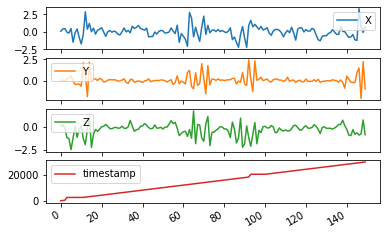

In [11]:
hip_data = pd.read_csv("left_hip/"+file_id+".csv")
hip_data.plot(subplots=True)

In [12]:
hip_data

,X,Y,Z,timestamp
0,0.093097,0.020759,0.103557,159
1,0.404265,0.053704,0.230850,352
2,0.459721,-0.048576,-0.172850,543
3,-0.042273,0.224421,-1.187734,2651
4,-0.167464,0.290941,-1.300966,2652
...,...,...,...,...
145,-1.226376,0.957795,-0.662145,29088
146,3.305601,1.482890,-0.905457,29280
147,0.756969,-2.103683,-0.777804,29473
148,-0.079056,2.234623,0.747772,29666


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bfb620940>,
      dtype=object)

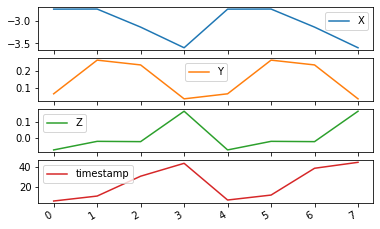

In [13]:
lwrist_data = pd.read_csv("left_wrist/"+file_id+".csv")
lwrist_data.plot(subplots=True)

In [8]:
hip_data = pd.read_csv("mocap/"+"subject1_file_11.csv")

In [9]:
hip_data

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,X27,Y27,Z27,X28,Y28,Z28,X29,Y29,Z29,timestamp
0,131.97238,-756.38641,1650.79211,144.49144,-870.16272,1586.86548,86.98423,-691.06897,1614.98938,-116.29382,...,-322.33002,-374.92828,113.73936,-72.37820,-532.87585,508.92273,-60.45206,-478.66937,88.18027,0
1,129.94482,-752.92792,1652.86060,142.49513,-867.10950,1589.68848,85.15250,-687.78339,1616.64038,-117.98213,...,-320.34641,-373.89673,112.82417,-72.79239,-532.24762,508.83878,-60.40261,-478.54810,88.19728,10
2,127.82046,-749.46423,1654.92236,140.43999,-864.00800,1592.48743,83.12692,-684.50372,1618.24268,-119.75175,...,-318.31015,-373.04889,111.84437,-73.15363,-531.80469,508.80746,-60.32140,-478.50058,88.19852,20
3,125.70858,-745.94366,1656.90637,138.21130,-860.92603,1595.18970,81.04404,-681.18207,1619.73633,-121.59201,...,-316.25690,-372.31522,110.73898,-73.50054,-531.45673,508.71997,-60.38081,-478.42996,88.14035,30
4,123.44659,-742.41241,1658.79309,136.07442,-857.76892,1597.89697,78.83280,-677.77374,1621.09351,-123.57182,...,-314.30774,-371.64536,109.65894,-73.91154,-531.08032,508.66049,-60.37984,-478.34186,88.13623,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,163.71771,-835.98944,1656.62683,162.60690,-949.13776,1590.06128,125.77733,-765.31665,1622.96082,-71.95807,...,-330.88229,-418.62097,139.02480,-23.04445,-561.89258,506.16223,19.75509,-523.05084,86.94301,29950
2996,164.49084,-836.67578,1656.13989,162.58594,-949.48712,1589.32690,126.75579,-765.70831,1622.67725,-71.19604,...,-331.54541,-418.66431,139.47639,-22.83792,-561.91199,506.15607,19.83954,-523.05847,86.95360,29960
2997,165.24123,-837.15985,1655.72485,163.18996,-950.08624,1588.79028,127.55339,-766.17017,1622.39990,-70.50993,...,-332.16971,-418.73807,139.90987,-22.65233,-562.01752,506.15649,19.79642,-523.04779,86.98373,29970
2998,165.86667,-837.53290,1655.33618,163.45583,-950.33813,1588.25818,128.41339,-766.36719,1622.17883,-69.91709,...,-332.71463,-418.82236,140.17380,-22.62840,-562.26691,506.21246,19.80838,-523.05054,86.97069,29980


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bfb4f6cf8>,
      dtype=object)

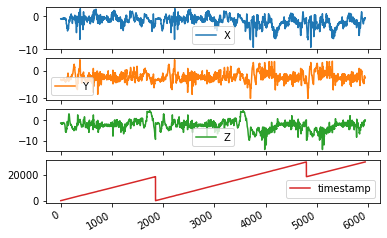

In [14]:
rwrist_data = pd.read_csv("right_wrist/"+file_id+".csv")
rwrist_data.plot(subplots=True)

As you can see, sometimes the data is noisy or missing. You need to decide how to handle such potential errors.